Predictions: [ 1.  1. -1.  1. -1. -1.]
Actual labels: [ 1  1 -1  1 -1 -1]


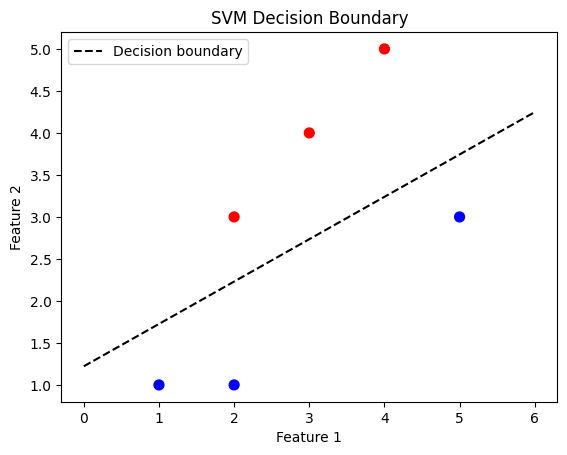

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# SVM class
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
 #__init__ is the constructor called when you create SVM().
#learning_rate → how fast the model updates weights during training.
#lambda_param → regularization strength (controls margin size).
#n_iters → number of epochs (loops over all data).
#w → weight vector (initialized later).
#b → bias term (initialized later).

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        y_ = np.where(y <= 0, -1, 1)#Outer loop → epochs: repeat training n_iters times.
        for _ in range(self.n_iters):#Inner loop → iterate over each data point x_i (index = idx).
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:#Case 1: point is correct and outside margin.
                            #Weight gradient = 2 * λ * w → only regularization affects weight.
                            #Bias gradient = 0 (bias not updated).
                    dw = 2 * self.lambda_param * self.w    
                    db = 0
                else:#Case 2: point is misclassified or inside margin.
                    #Weight gradient = regularization term + hinge loss term.
                    #Bias gradient = hinge loss term (-y_i).
                    dw = 2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    db = -y_[idx]
                self.w -= self.lr * dw
                self.b -= self.lr * db

#predict() calculates the linear function w·x + b.
#np.sign() → outputs 1 if positive, -1 if negative.
#Returns predicted class labels
    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)

# Sample data
X = np.array([
    [2, 3],
    [3, 4],
    [1, 1],
    [4, 5],
    [2, 1],
    [5, 3]
])
y = np.array([1, 1, -1, 1, -1, -1])

# Train SVM
svm = SVM(learning_rate=0.01, lambda_param=0.01, n_iters=1000)
svm.fit(X, y)
predictions = svm.predict(X)
print("Predictions:", predictions)
print("Actual labels:", y)

# Plot decision boundary
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=50)
x0 = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 100)
x1 = -(svm.w[0]*x0 + svm.b)/svm.w[1]
plt.plot(x0, x1, 'k--', label='Decision boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()
